In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../bin/imports.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


##Create a dataframe for MHC-I and MHC-II statistical analysis <br>


In [2]:
patient_affinitiesI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassI.csv', index_col=0)
patient_affinitiesII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassII.csv', index_col=0)
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.conservative.mut.csv', index_col=0)

In [3]:
print patient_affinitiesI.shape, patient_affinitiesII.shape

(5942, 1018) (5942, 1018)


In [4]:
# group mutations by frequency
counts = list(patient_mutations.sum().unique())
mutations_by_count = {}
for count in counts:
    # group all of the mutations with this count in TCGA
    mutations_by_count[count] = list(patient_mutations.sum()[patient_mutations.sum() == count].index)
    # Add column for each patient with the median of their affinities for that mutation count
    patient_affinitiesI[count] = patient_affinitiesI[mutations_by_count[count]].median(axis=1)
    patient_affinitiesII[count] = patient_affinitiesII[mutations_by_count[count]].median(axis=1)
counts.sort()

In [5]:
groupedI = patient_affinitiesI.ix[:, counts].median().reset_index()
groupedI.columns = ['index', 'scores']
p, rho = sp.spearmanr(groupedI.index, groupedI.scores)[1], sp.spearmanr(groupedI.index, groupedI.scores)[0]
print p, rho

1.01963472265e-06 0.655599472991


In [6]:
groupedII = patient_affinitiesII.ix[:, counts].median().reset_index()
groupedII.columns = ['index', 'scores']
p, rho = sp.spearmanr(groupedII.index, groupedII.scores)[1], sp.spearmanr(groupedII.index, groupedII.scores)[0]
print p, rho

0.0728908326581 0.269969366726


In [7]:
groupedI.columns = ['count', 'MHCI']
groupedII.columns = ['count', 'MHCII']

In [8]:
grouped = pd.merge(groupedI, groupedII, on='count')

In [10]:
grouped.head()

,count,MHCI,MHCII
0,0,1.196293,14.447780
1,1,1.938311,17.590300
2,2,1.858618,16.729044
3,3,1.993229,17.452043
4,4,1.551420,15.961471


In [11]:
grouped.to_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/population/medians_for_both_classes.csv')

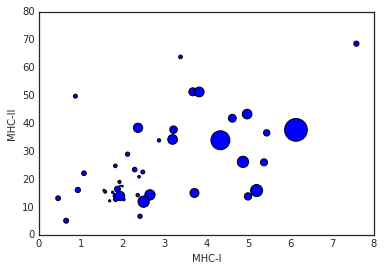

In [15]:
# not in manuscript
plt.scatter(grouped.MHCI, groupedII.MHCII, s=grouped['count'])
plt.xlabel('MHC-I')
plt.ylabel('MHC-II')

Non-grouped

Grouped

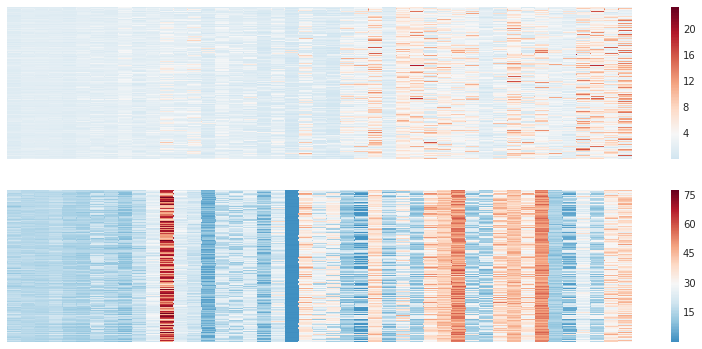

In [9]:
f, axarr = plt.subplots(2, sharex=True, figsize=(14,6))
sns.heatmap(patient_affinitiesI.ix[:, counts], xticklabels=False, yticklabels=False, center=4, 
            cmap='RdBu_r', ax=axarr[0])
sns.heatmap(patient_affinitiesII.ix[:, counts], xticklabels=False, yticklabels=False, center=30, 
            cmap='RdBu_r', ax=axarr[1])

In [10]:
grouped.head()

,count,MHCI,MHCII
0,0,1.585844,17.001946
1,1,1.885529,16.704949
2,2,1.881451,16.468631
3,3,1.876476,17.307235
4,4,1.683050,15.140241


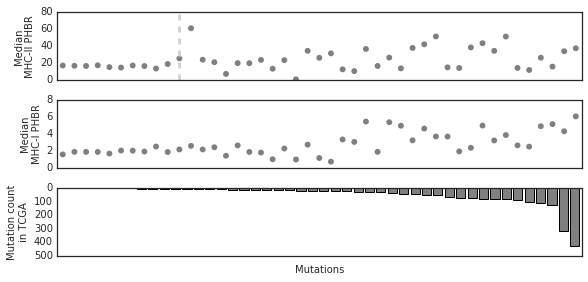

In [22]:
plt.figure(figsize=(8.25,4))

ax1 = plt.subplot2grid((3, 1), (1, 0))
sns.pointplot(x='count', y='MHCI', data=grouped, ylim=(0, 80), color="grey", 
                         join=False, ax=ax1)
plt.ylabel('Median\nMHC-I PHBR')
plt.locator_params(axis='y', nbins=5)
ax1.set(xticklabels=[])
plt.xlabel(' ')
plt.tight_layout()

ax2 = plt.subplot2grid((3, 1), (0, 0))
sns.pointplot(x='count', y='MHCII', data=grouped, color="grey", 
              join=False, ax=ax2)
ax2.set_ylim(0, 80)
plt.axvline(x=10, c='lightgrey', linewidth=3, linestyle='--')
plt.locator_params(axis='y', nbins=5)
plt.xticks(rotation=45, size=7)
plt.ylabel('Median\nMHC-II PHBR')
ax2.set(xticklabels=[])
plt.xlabel(' ')
plt.tight_layout()

ax3 = plt.subplot2grid((3, 1), (2, 0))
plt.gca().invert_yaxis()
plt.bar(range(1, len(counts)+1), counts, color='grey')
plt.xlim(0, 46)
plt.locator_params(axis='y', nbins=5)
ax3.set(xticklabels=[])
plt.ylabel('Mutation count\nin TCGA')
plt.xlabel('Mutations')
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/frequency/medians.conservative.pdf')

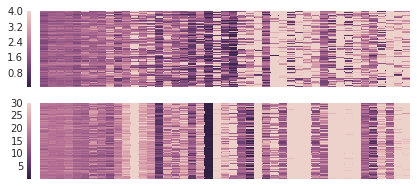

In [13]:
plt.figure(figsize=(8,3))
ax1 = plt.subplot2grid((2, 1), (0, 0))
sns.heatmap(patient_affinitiesI.ix[:, counts], xticklabels=False, yticklabels=False, vmax=4, 
            cmap=sns.cubehelix_palette(reverse=True, as_cmap=True), ax=ax1,
           cbar_kws = dict(use_gridspec=False,location="left", pad=0.02))
ax2 = plt.subplot2grid((2, 1), (1, 0))
sns.heatmap(patient_affinitiesII.ix[:, counts], xticklabels=False, yticklabels=False, vmax=30, 
            cmap=sns.cubehelix_palette(reverse=True, as_cmap=True), ax=ax2,
           cbar_kws = dict(use_gridspec=False,location="left", pad=0.02))
#plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/frequency/heatmap.conservative.pdf')